In [48]:
# !pip install gdown
# !pip install -U scikit-learn
# !pip install imbalanced-learn
# !pip install seaborn

In [81]:
from utils.Util import *
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transform
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import cv2 as cv
from zipfile import ZipFile
import gdown
from models.CNNSimple import CNNSimple
from models.CNNResNet import CNNResNet
from models.CNNSmall import CNNSmall
from models.Model import Model

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [50]:
data_set_url = 'https://drive.google.com/uc?id=1hILStd3NReX_y8GgNVs9YEN2Y6_8HNpd'
file = 'archive2.zip'

In [51]:
#Descargar y extraer si no existe el archivo.
if not os.path.exists(file):
    gdown.download(data_set_url, file, quiet=False)
    with ZipFile('archive2.zip', 'r') as zipObj:
        zipObj.extractall(path='./data') 

In [82]:
LOAD=False
VERSION = '01'
LOAD_VERSION = ''

In [83]:
DIR = './data/dataset'
RESIZE = (140,140)
CLASES = os.listdir(DIR)
BATCH_SIZE = 16
LEN_CLASES = len(CLASES)
print(CLASES)
print(LEN_CLASES)


['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
11


In [84]:
#Resie all images
trans = transform.Compose([
    transform.Resize(RESIZE),
    transform.ToTensor()
])

In [85]:
dataset = ImageFolder(DIR,transform=trans)

In [86]:
image,label = dataset[0]
print(image.shape)
print(len(dataset))

torch.Size([3, 140, 140])
6862


Label:  dew (0)


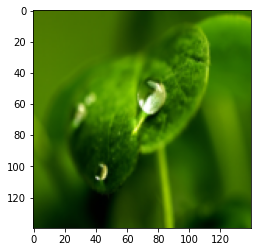

In [87]:
show_example(*dataset[0],dataset)

In [88]:
random_seed = 34
torch.manual_seed(random_seed)


In [89]:
LEN_DATASET = len(dataset)
LEN_TRAIN_SET = round(LEN_DATASET*0.8)
LEN_VALIDATION_SET = round(LEN_DATASET*0.1)
LEN_TEST_SET = round(LEN_DATASET*0.1)
print(LEN_DATASET)
print(LEN_TRAIN_SET,LEN_VALIDATION_SET,LEN_TEST_SET)

6862
5490 686 686


In [60]:
#Normalizar los datos
#MEAN, DS = get_mean_and_std(DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True))

In [90]:
normalize_compose = transform.Compose([
    transform.Resize(RESIZE),
    transform.ToTensor(),
    #transform.Normalize(MEAN, DS, inplace=False),
])

In [91]:
dataset = ImageFolder(DIR, transform=normalize_compose)

In [92]:
TRAIN_DATA, TEST_DATA,VALID_DATA = random_split(dataset, [LEN_TRAIN_SET, LEN_VALIDATION_SET,LEN_TEST_SET])

In [64]:
# dist_train = [ x[1] for x in TRAIN_DATA]
# dist_test = [ x[1] for x in TEST_DATA]
# dist_valid = [ x[1] for x in VALID_DATA]



In [65]:
# plt.hist(dist_train,bins=LEN_CLASES)
# plt.title('Distribucion de clases train')
# plt.show()
# plt.hist(dist_test,bins=LEN_CLASES)
# plt.title('Distribucion de clases test')
# plt.show()
# plt.hist(dist_valid,bins=LEN_CLASES)
# plt.title('Distribucion de clases valid')
# plt.show()

In [93]:
TRAIN_DL = DataLoader(TRAIN_DATA, batch_size=BATCH_SIZE, shuffle=True)
VALID_DL = DataLoader(VALID_DATA, batch_size=BATCH_SIZE, shuffle=True)
TEST_DL = DataLoader(TEST_DATA, batch_size=BATCH_SIZE, shuffle=True)

16


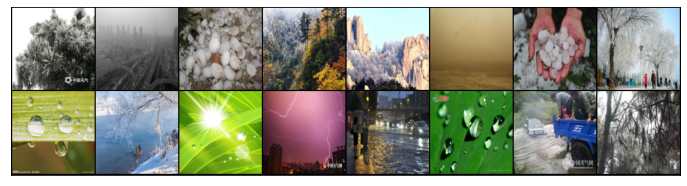

In [94]:
show_batch(TRAIN_DL)
#show_batch_denormalize(TRAIN_DL,MEAN,DS)

In [95]:
device = get_default_device()
print(device)

cuda


In [96]:
TRAIN_DEVICE_DL = DeviceDataLoader(TRAIN_DL, device)
VALID_DEVICE_DL = DeviceDataLoader(VALID_DL, device)
TEST_DEVICE_DL = DeviceDataLoader(TEST_DL, device)

In [97]:
learning_rate =  0.001
num_epochs = 20
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam

# Tiny Model CNN (3 CONV LAYERS + LINEAR LAYER)

In [98]:
#MODELO Tiny CNN
modeloSmall = to_device(CNNSmall(LEN_CLASES), device)

Epoch [1/20],Loss Train 1.6497,val_loss:1.7045,Accuracy 0.4620
Epoch [2/20],Loss Train 1.2691,val_loss:1.1186,Accuracy 0.6383
Epoch [3/20],Loss Train 1.1448,val_loss:1.0044,Accuracy 0.6719
Epoch [4/20],Loss Train 1.0429,val_loss:1.0702,Accuracy 0.6636
Epoch [5/20],Loss Train 1.0028,val_loss:1.4092,Accuracy 0.5353
Epoch [6/20],Loss Train 0.9484,val_loss:0.9972,Accuracy 0.6526
Epoch [7/20],Loss Train 0.9061,val_loss:0.8676,Accuracy 0.7180
Epoch [8/20],Loss Train 0.8402,val_loss:0.8115,Accuracy 0.7197
Epoch [9/20],Loss Train 0.8310,val_loss:0.9217,Accuracy 0.6825
Epoch [10/20],Loss Train 0.7975,val_loss:0.8341,Accuracy 0.7409
Epoch [11/20],Loss Train 0.7251,val_loss:0.8033,Accuracy 0.7280
Epoch [12/20],Loss Train 0.7155,val_loss:0.7854,Accuracy 0.7533
Epoch [13/20],Loss Train 0.6967,val_loss:0.7372,Accuracy 0.7627
Epoch [14/20],Loss Train 0.6735,val_loss:0.7994,Accuracy 0.7627
Epoch [15/20],Loss Train 0.6334,val_loss:0.8046,Accuracy 0.7340
Epoch [16/20],Loss Train 0.6337,val_loss:0.7690,A

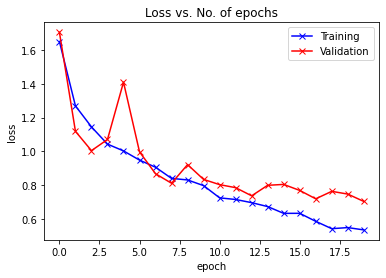

In [104]:
if(LOAD):
    modeloSmall.load_state_dict(torch.load('db/cnnSmall'+LOAD_VERSION+'.pth'))
    smodel = Model(modeloSmall)
else: 
    smodel = Model(modeloSmall)
    logSmall=smodel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logSmall)
    torch.save(modeloSmall.state_dict(), 'db/cnnSmall'+VERSION+'.pth')

In [73]:
#plot_losses(logSmall)

# Result for TRAIN DATASET

Error: 0.3365163207054138 Accuracy: 0.887536346912384


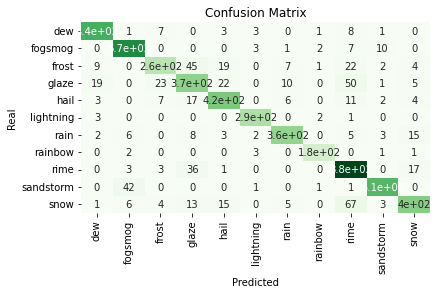

Sensitivity
88.85
Specificity
98.89
F1-score
88.85
Accuracy
88.85


In [105]:
smodelResTrain = smodel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",smodelResTrain['error'], "Accuracy:",smodelResTrain['acc'])
MatrixScore(smodelResTrain['outputs']['labels'],smodelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.7045044302940369 Accuracy: 0.7767857313156128


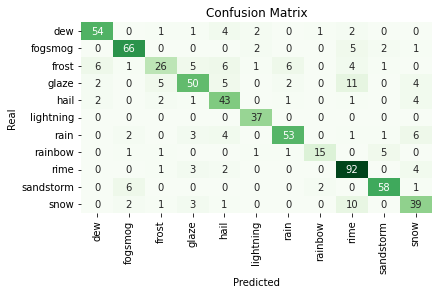

Sensitivity
77.7
Specificity
97.77
F1-score
77.7
Accuracy
77.7


In [106]:
smodelResValid = smodel.evaluate(VALID_DEVICE_DL,True)
print("Error:",smodelResValid['error'], "Accuracy:",smodelResValid['acc'])
MatrixScore(smodelResValid['outputs']['labels'],smodelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.8460162878036499 Accuracy: 0.7566444873809814


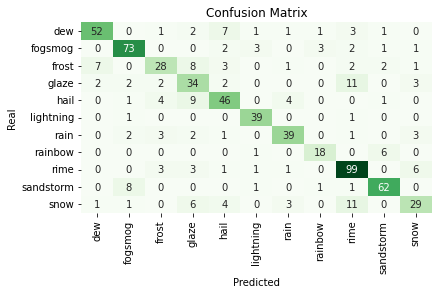

Sensitivity
75.66
Specificity
97.57
F1-score
75.66
Accuracy
75.66


In [107]:
smodelResTest = smodel.evaluate(TEST_DEVICE_DL,True)
print("Error:",smodelResTest['error'], "Accuracy:",smodelResTest['acc'])
MatrixScore(smodelResTest['outputs']['labels'],smodelResTest['outputs']['predicted'],CLASES)


In [ ]:
#guardamos el modelo
#torch.save(modeloSmall.state_dict(), 'db/cnnSmall.pth')

#  Simple Model CNN (5 LAYERS + 1 LINEAR)

In [108]:
modeloSimple = to_device(CNNSimple(LEN_CLASES), device)

Epoch [1/20],Loss Train 1.5360,val_loss:1.3602,Accuracy 0.5330
Epoch [2/20],Loss Train 1.2402,val_loss:1.0948,Accuracy 0.6497
Epoch [3/20],Loss Train 1.0808,val_loss:1.0466,Accuracy 0.6574
Epoch [4/20],Loss Train 0.9865,val_loss:1.0959,Accuracy 0.6507
Epoch [5/20],Loss Train 0.9262,val_loss:1.0992,Accuracy 0.6505
Epoch [6/20],Loss Train 0.8540,val_loss:0.8763,Accuracy 0.7203
Epoch [7/20],Loss Train 0.8604,val_loss:0.8314,Accuracy 0.7162
Epoch [8/20],Loss Train 0.7550,val_loss:0.8273,Accuracy 0.7328
Epoch [9/20],Loss Train 0.7283,val_loss:0.8464,Accuracy 0.7286
Epoch [10/20],Loss Train 0.6932,val_loss:0.8094,Accuracy 0.7216
Epoch [11/20],Loss Train 0.6891,val_loss:0.7917,Accuracy 0.7512
Epoch [12/20],Loss Train 0.5997,val_loss:0.8826,Accuracy 0.7566
Epoch [13/20],Loss Train 0.5605,val_loss:0.7725,Accuracy 0.7583
Epoch [14/20],Loss Train 0.5416,val_loss:0.7174,Accuracy 0.7782
Epoch [15/20],Loss Train 0.4902,val_loss:0.7963,Accuracy 0.7444
Epoch [16/20],Loss Train 0.4644,val_loss:0.9042,A

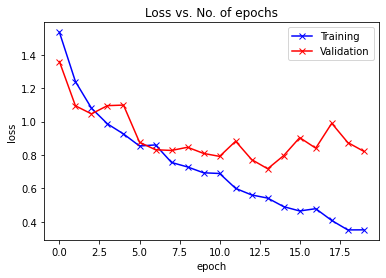

In [109]:
if(LOAD):
    modeloSimple.load_state_dict(torch.load('db/cnnSimple'+LOAD_VERSION+'.pth'))
    simModel = Model(modeloSimple)
else: 
    simModel = Model(modeloSimple)
    logSimple= simModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logSimple)
    torch.save(modeloSimple.state_dict(), 'db/cnnSimple'+VERSION+'.pth')

In [ ]:
#logSimple = simModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)

Epoch [1/20],Loss Train 1.5399,val_loss:1.2839,Accuracy 0.5818
Epoch [2/20],Loss Train 1.2122,val_loss:1.0051,Accuracy 0.6541
Epoch [3/20],Loss Train 1.0769,val_loss:0.9987,Accuracy 0.6547
Epoch [4/20],Loss Train 1.0083,val_loss:0.9366,Accuracy 0.6840
Epoch [5/20],Loss Train 0.9244,val_loss:0.8814,Accuracy 0.7155
Epoch [6/20],Loss Train 0.8826,val_loss:0.8189,Accuracy 0.7390
Epoch [7/20],Loss Train 0.8312,val_loss:0.8294,Accuracy 0.7392
Epoch [8/20],Loss Train 0.7464,val_loss:1.0157,Accuracy 0.6956
Epoch [9/20],Loss Train 0.7394,val_loss:0.8668,Accuracy 0.7317
Epoch [10/20],Loss Train 0.6834,val_loss:0.7714,Accuracy 0.7523
Epoch [11/20],Loss Train 0.6407,val_loss:0.7526,Accuracy 0.7598
Epoch [12/20],Loss Train 0.6240,val_loss:0.8365,Accuracy 0.7452
Epoch [13/20],Loss Train 0.5757,val_loss:0.7601,Accuracy 0.7801
Epoch [14/20],Loss Train 0.5423,val_loss:0.8050,Accuracy 0.7521
Epoch [15/20],Loss Train 0.4896,val_loss:0.7694,Accuracy 0.7919
Epoch [16/20],Loss Train 0.4602,val_loss:0.9109,A

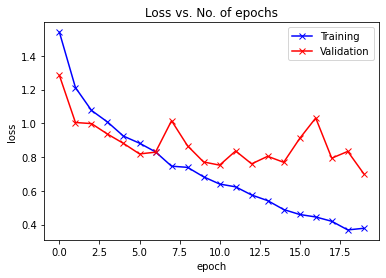

In [ ]:
#plot_losses(logSimple)

# Result for TRAIN DATASET

Error: 0.27502721548080444 Accuracy: 0.9038881063461304


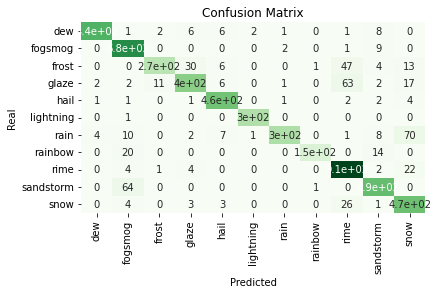

Sensitivity
90.36
Specificity
99.04
F1-score
90.36
Accuracy
90.36


In [110]:
simModelResTrain = simModel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",simModelResTrain['error'], "Accuracy:",simModelResTrain['acc'])
MatrixScore(simModelResTrain['outputs']['labels'],simModelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.8224087953567505 Accuracy: 0.7697258591651917


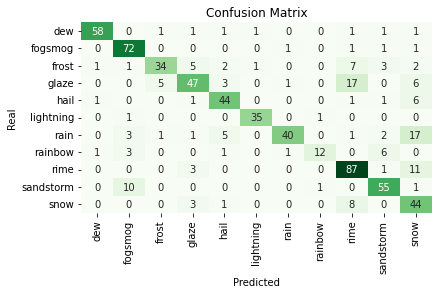

Sensitivity
76.97
Specificity
97.7
F1-score
76.97
Accuracy
76.97


In [111]:
simModelResValid = simModel.evaluate(VALID_DEVICE_DL,True)
print("Error:",simModelResValid['error'], "Accuracy:",simModelResValid['acc'])
MatrixScore(simModelResValid['outputs']['labels'],simModelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.9381682872772217 Accuracy: 0.7545680403709412


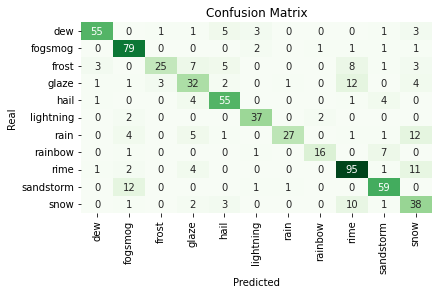

Sensitivity
75.51
Specificity
97.55
F1-score
75.51
Accuracy
75.51


In [112]:
simModelResTest = simModel.evaluate(TEST_DEVICE_DL,True)
print("Error:",simModelResTest['error'], "Accuracy:",simModelResTest['acc'])
MatrixScore(simModelResTest['outputs']['labels'],simModelResTest['outputs']['predicted'],CLASES)


#  ResNet Model CNN (8 LAYERS + 1 LINEAR)

In [113]:
modeloResnet = to_device(CNNResNet(LEN_CLASES), device)

Epoch [1/20],Loss Train 1.4634,val_loss:1.0934,Accuracy 0.6100
Epoch [2/20],Loss Train 1.1087,val_loss:1.1174,Accuracy 0.6414
Epoch [3/20],Loss Train 0.9039,val_loss:0.8951,Accuracy 0.6952
Epoch [4/20],Loss Train 0.8075,val_loss:0.8078,Accuracy 0.7157
Epoch [5/20],Loss Train 0.7138,val_loss:1.4211,Accuracy 0.5862
Epoch [6/20],Loss Train 0.6506,val_loss:0.6074,Accuracy 0.7872
Epoch [7/20],Loss Train 0.5264,val_loss:0.6862,Accuracy 0.7685
Epoch [8/20],Loss Train 0.4891,val_loss:0.7355,Accuracy 0.7637
Epoch [9/20],Loss Train 0.4279,val_loss:0.8459,Accuracy 0.7450
Epoch [10/20],Loss Train 0.4037,val_loss:0.9014,Accuracy 0.7400
Epoch [11/20],Loss Train 0.3595,val_loss:0.5989,Accuracy 0.7990
Epoch [12/20],Loss Train 0.2444,val_loss:0.6568,Accuracy 0.8221
Epoch [13/20],Loss Train 0.2496,val_loss:0.6575,Accuracy 0.7986
Epoch [14/20],Loss Train 0.2063,val_loss:0.7822,Accuracy 0.7930
Epoch [15/20],Loss Train 0.1721,val_loss:0.6077,Accuracy 0.8071
Epoch [16/20],Loss Train 0.1453,val_loss:0.6162,A

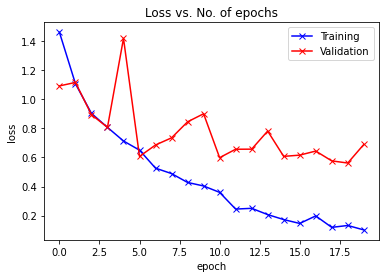

In [114]:
if(LOAD):
    modeloResnet.load_state_dict(torch.load('db/cnnResNet'+LOAD_VERSION+'.pth'))
    ResNetModel = Model(modeloResnet)
else: 
    ResNetModel = Model(modeloResnet)
    logResnet = ResNetModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logResnet)
    torch.save(modeloResnet.state_dict(), 'db/cnnResNet'+VERSION+'.pth')

In [ ]:
# %%time
# logResnet = ResNetModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)

Epoch [1/20],Loss Train 1.4034,val_loss:1.1947,Accuracy 0.6140
Epoch [2/20],Loss Train 1.0551,val_loss:1.0530,Accuracy 0.6605
Epoch [3/20],Loss Train 0.9120,val_loss:0.9096,Accuracy 0.7010
Epoch [4/20],Loss Train 0.7769,val_loss:0.7739,Accuracy 0.7604
Epoch [5/20],Loss Train 0.6783,val_loss:0.9024,Accuracy 0.7276
Epoch [6/20],Loss Train 0.6070,val_loss:0.8191,Accuracy 0.7417
Epoch [7/20],Loss Train 0.5034,val_loss:0.7710,Accuracy 0.7654
Epoch [8/20],Loss Train 0.5311,val_loss:0.7671,Accuracy 0.7787
Epoch [9/20],Loss Train 0.3808,val_loss:0.8568,Accuracy 0.7427
Epoch [10/20],Loss Train 0.3139,val_loss:0.7124,Accuracy 0.7753
Epoch [11/20],Loss Train 0.3363,val_loss:0.7007,Accuracy 0.7973
Epoch [12/20],Loss Train 0.2756,val_loss:0.7302,Accuracy 0.8002
Epoch [13/20],Loss Train 0.1926,val_loss:0.7827,Accuracy 0.7710
Epoch [14/20],Loss Train 0.1648,val_loss:0.7364,Accuracy 0.8075
Epoch [15/20],Loss Train 0.1733,val_loss:0.8596,Accuracy 0.7728
Epoch [16/20],Loss Train 0.1729,val_loss:0.7490,A

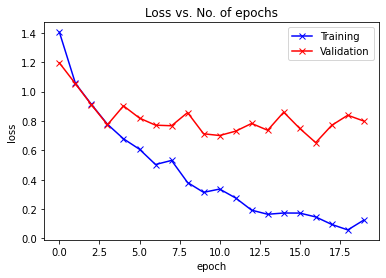

In [ ]:
# plot_losses(logResnet)

# Result for TRAIN DATASET

Error: 0.08758032321929932 Accuracy: 0.9722020626068115


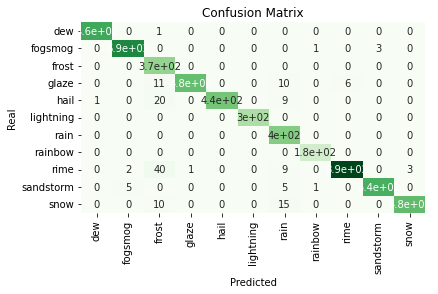

Sensitivity
97.21
Specificity
99.72
F1-score
97.21
Accuracy
97.21


In [115]:
ResNetModelResTrain = ResNetModel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",ResNetModelResTrain['error'], "Accuracy:",ResNetModelResTrain['acc'])
MatrixScore(ResNetModelResTrain['outputs']['labels'],ResNetModelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.6907299160957336 Accuracy: 0.8135381937026978


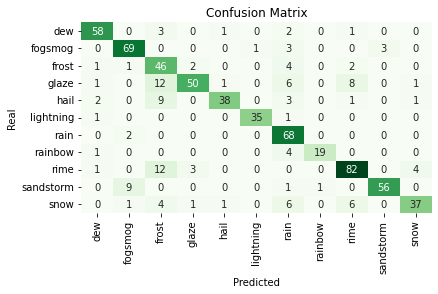

Sensitivity
81.34
Specificity
98.13
F1-score
81.34
Accuracy
81.34


In [116]:
ResNetModelResValid = ResNetModel.evaluate(VALID_DEVICE_DL,True)
print("Error:",ResNetModelResValid['error'], "Accuracy:",ResNetModelResValid['acc'])
MatrixScore(ResNetModelResValid['outputs']['labels'],ResNetModelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.7374970316886902 Accuracy: 0.8095930218696594


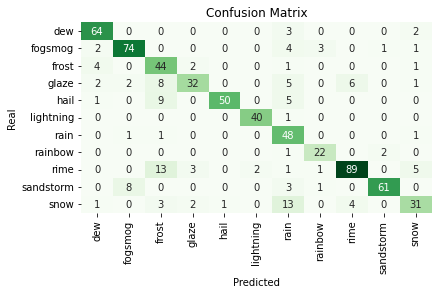

Sensitivity
80.9
Specificity
98.09
F1-score
80.9
Accuracy
80.9


In [117]:
ResNetModelResTest = ResNetModel.evaluate(TEST_DEVICE_DL,True)
print("Error:",ResNetModelResTest['error'], "Accuracy:",ResNetModelResTest['acc'])
MatrixScore(ResNetModelResTest['outputs']['labels'],ResNetModelResTest['outputs']['predicted'],CLASES)


In [ ]:
#guardamos el modelo
#torch.save(modeloResnet.state_dict(), 'db/cnnResNet.pth')

# Test with images in Google

In [118]:
#Load new Dataset
DIR_NEW = './otherdataset'
OTHER_DATA_SET = ImageFolder(DIR_NEW,transform=normalize_compose)

In [119]:
OTHER_DL = DataLoader(OTHER_DATA_SET, batch_size=BATCH_SIZE, shuffle=True)

In [120]:
OTHER_DEVICE_LOADER = DeviceDataLoader(OTHER_DL, device)

Error: 0.4145500361919403 Accuracy: 0.9090909361839294


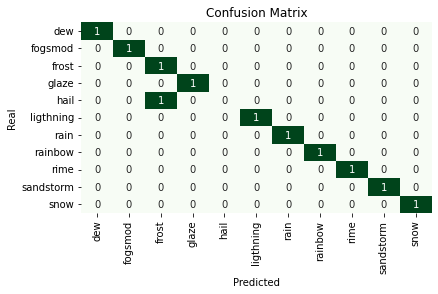

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [121]:
smodelResTrainO = smodel.evaluate(OTHER_DEVICE_LOADER,True)
print("Error:",smodelResTrainO['error'], "Accuracy:",smodelResTrainO['acc'])
MatrixScore(smodelResTrainO['outputs']['labels'],smodelResTrainO['outputs']['predicted'],OTHER_DATA_SET.classes)

Label: dew , Predicted: dew


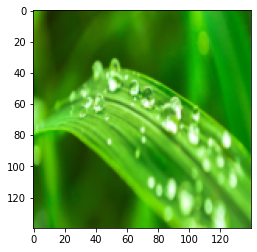

In [122]:
#print(OTHER_DATA_SET[0])
img1,label1= OTHER_DATA_SET[0]
plt.imshow(img1.permute(1, 2, 0))
print('Label:', OTHER_DATA_SET.classes[label1], ', Predicted:', smodel.predict(img1,OTHER_DATA_SET.classes,device,to_device))

Label: fogsmod , Predicted: fogsmod


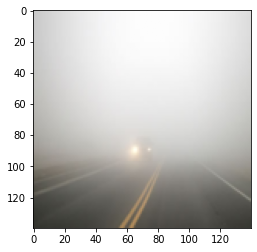

In [123]:
#print(OTHER_DATA_SET[0])
img2,label2= OTHER_DATA_SET[1]
plt.imshow(img2.permute(1, 2, 0))
print('Label:', OTHER_DATA_SET.classes[label2], ', Predicted:', smodel.predict(img2,OTHER_DATA_SET.classes,device,to_device))

Label: frost , Predicted: frost


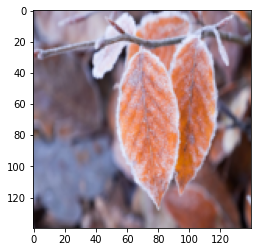

In [124]:
#print(OTHER_DATA_SET[0])
img3,label3= OTHER_DATA_SET[2]
plt.imshow(img3.permute(1, 2, 0))
print('Label:', OTHER_DATA_SET.classes[label3], ', Predicted:', smodel.predict(img3,OTHER_DATA_SET.classes,device,to_device))

Label: glaze , Predicted: glaze


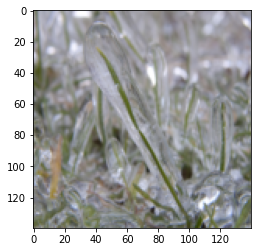

In [125]:
#print(OTHER_DATA_SET[0])
img4,label4= OTHER_DATA_SET[3]
plt.imshow(img4.permute(1, 2, 0))
print('Label:', OTHER_DATA_SET.classes[label4], ', Predicted:', smodel.predict(img4,OTHER_DATA_SET.classes,device,to_device))

Error: 0.21177300810813904 Accuracy: 0.9090909361839294


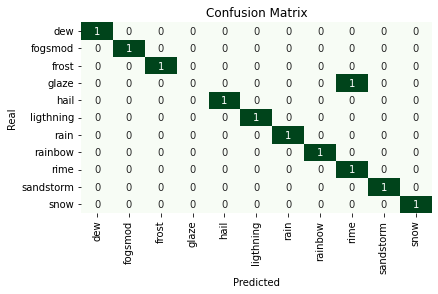

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [126]:
simModelResTesto = simModel.evaluate(OTHER_DEVICE_LOADER,True)
print("Error:",simModelResTesto['error'], "Accuracy:",simModelResTesto['acc'])
MatrixScore(simModelResTesto['outputs']['labels'],simModelResTesto['outputs']['predicted'],OTHER_DATA_SET.classes)

Error: 0.23877111077308655 Accuracy: 0.9090909361839294


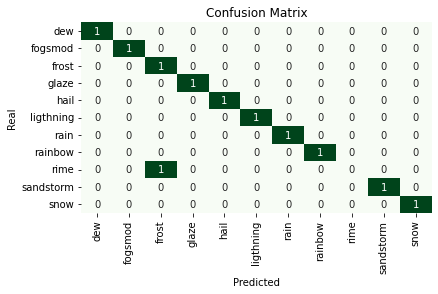

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [127]:
ResTesto = ResNetModel.evaluate(OTHER_DEVICE_LOADER,True)
print("Error:",ResTesto['error'], "Accuracy:",ResTesto['acc'])
MatrixScore(ResTesto['outputs']['labels'],ResTesto['outputs']['predicted'],OTHER_DATA_SET.classes)


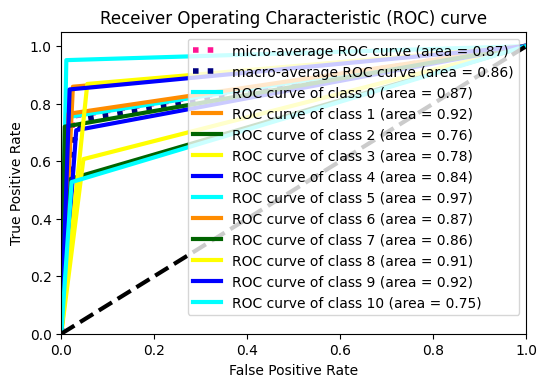

In [165]:
plot_roc_curve(smodelResTest['outputs']['labels'],smodelResTest['outputs']['predicted'])

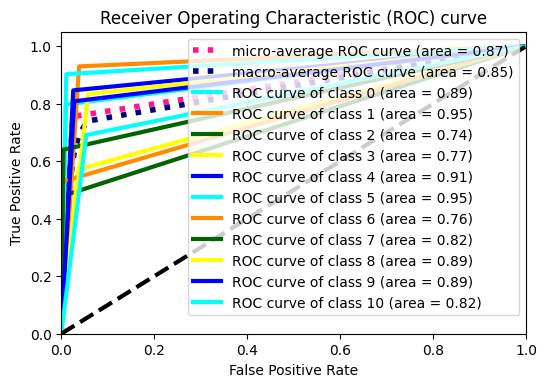

In [166]:
plot_roc_curve(simModelResTest['outputs']['labels'],simModelResTest['outputs']['predicted'])

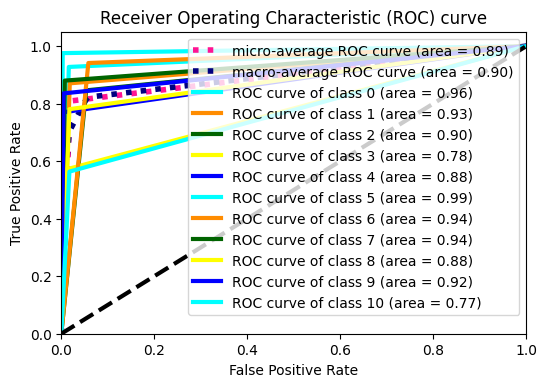

In [167]:
plot_roc_curve(ResNetModelResTest['outputs']['labels'],ResNetModelResTest['outputs']['predicted'])